Let's start with defining the dataset path to our train images

In [56]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

In [57]:
#
# import torch

In [58]:
DATASET_PATH = 'Cars_Dataset/Train'

In order to set Data classes name we retrieve the names of the folders. To do this we need to execute the following code

In [59]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [60]:
class_names

['bmw_525i_1995',
 'honda_civic_1995',
 'nissan_skyline_1999',
 'toyota_mark_2_1996',
 'toyota_supra_1998']

In [61]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)
    

In [62]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)


In [63]:
df.head()


,name,label
0,Cars_Dataset/Train/bmw_525i_1995/bmw525i19950.jpeg,0
1,Cars_Dataset/Train/bmw_525i_1995/bmw525i19951.jpeg,0
2,Cars_Dataset/Train/bmw_525i_1995/bmw525i199510.jpeg,0
3,Cars_Dataset/Train/bmw_525i_1995/bmw525i199511.jpeg,0
4,Cars_Dataset/Train/bmw_525i_1995/bmw525i199512.jpeg,0


In [55]:
df.tail()


,name,label
445,Cars_Dataset/Train/toyota_supra_1998/toyotasupra1998rear69.jpeg,4
446,Cars_Dataset/Train/toyota_supra_1998/toyotasupra1998rear74.jpeg,4
447,Cars_Dataset/Train/toyota_supra_1998/toyotasupra1998rear75.jpeg,4
448,Cars_Dataset/Train/toyota_supra_1998/toyotasupra1998rear76.jpeg,4
449,Cars_Dataset/Train/toyota_supra_1998/toyotasupra1998rear9.jpeg,4


In [64]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)


Loading the data

In [16]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)


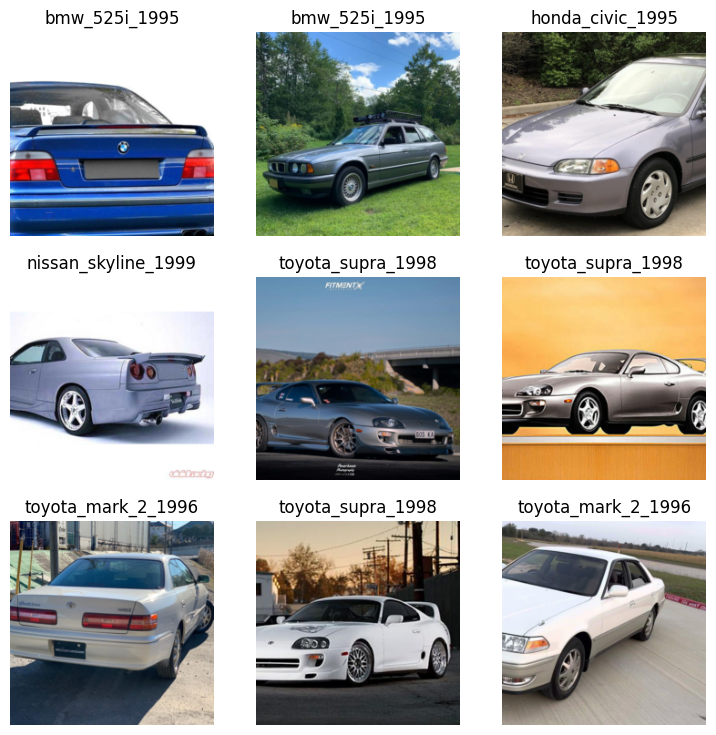

In [17]:
dls.show_batch()

Creating the model

In [ ]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)


Tuning the model

In [21]:
model.fine_tune(
    epochs=5,
    lr_mult=3
)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.395631,0.861735,0.722222,0.277778,00:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.728857,1.308189,0.677778,0.322222,00:09
1,0.918136,3.586209,0.655556,0.344444,00:09
2,0.870646,0.714754,0.800000,0.200000,00:09
3,0.673105,0.359277,0.855556,0.144444,00:09
4,0.508443,0.320465,0.866667,0.133333,00:09


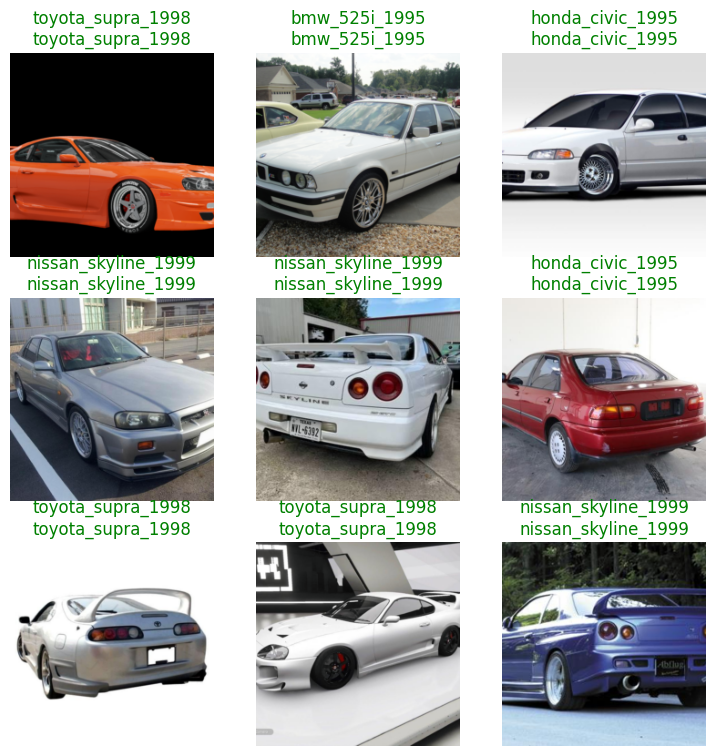

In [22]:
model.show_results()

In [23]:
BATCH_SIZE = 16
model = models.resnet50
NUMBER_WORKERS = 8

In [24]:



dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    num_workers=NUMBER_WORKERS, 
    bs=BATCH_SIZE, 
    #device=torch.device('cuda'), #Uncomment if you want to use cuda GPU acceleration for better performance
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
    
)





In [114]:
#loss_func = nn.CrossEntropyLoss()

Now we will use Learner from Fastai to generate the graph finding the valley and then finetune our model to compare the results and enhance the model

In [25]:
learn = vision_learner(dls, models.resnet50, metrics=error_rate )



After tuning dls setting and increasing computation abilities We managed to shift valley to better results. 

SuggestedLRs(valley=0.0010000000474974513)

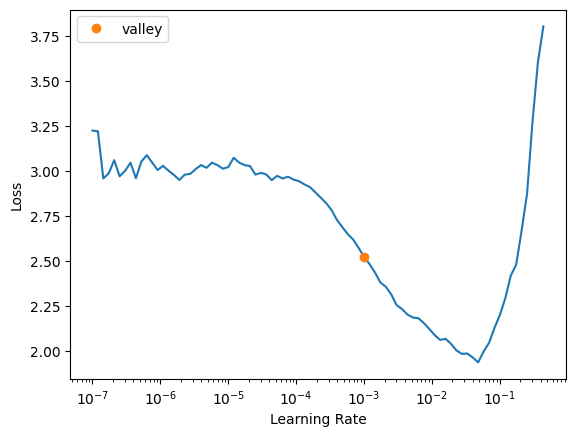

In [26]:
learn.lr_find()

In [27]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.822675,1.280780,0.355556,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.778891,0.777816,0.211111,00:09
1,0.721965,0.819390,0.222222,00:09
2,0.535271,0.514945,0.166667,00:09
3,0.367426,0.526706,0.133333,00:09


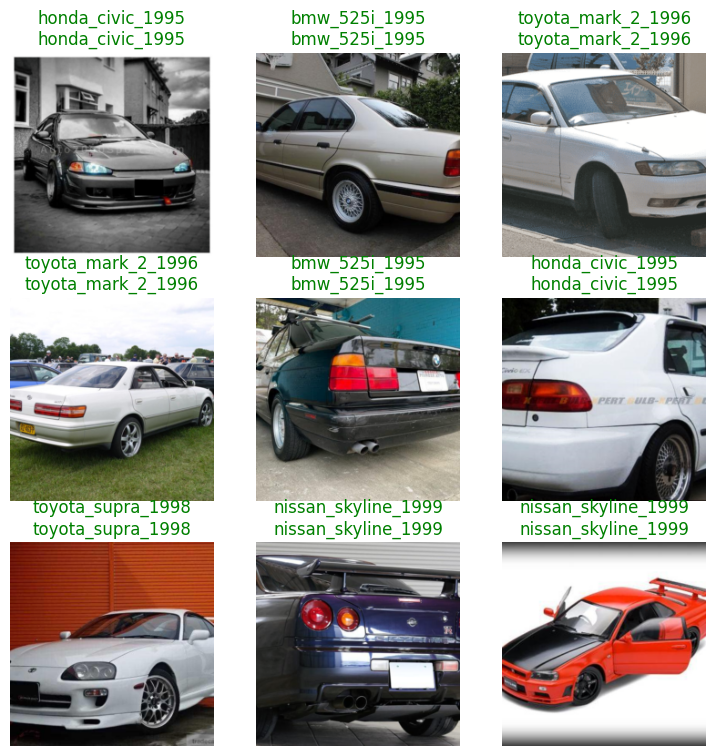

In [29]:
learn.show_results()

By using learner we were able to enhance our results by 30%. 

In [31]:
learn.export('CarBrandClassifierTeam05.pkl')

In [32]:
new_model = load_learner(f'{DATASET_PATH}/CarBrandClassifierTeam05.pkl')

In [40]:
#path = r'Cars_Dataset\Test\toyota_mark_2_1996\toyotamark21996248.jpeg'
#os.sep.join(path.rsplit(r"/")[-2:])

new_model.predict(
    item='Cars_Dataset\\Test\\nissan_skyline_1999\\nissanskyline1999238.jpeg'
)


('nissan_skyline_1999',
 TensorBase(2),
 TensorBase([7.9427e-08, 1.0117e-03, 9.9899e-01, 9.4571e-08, 2.3558e-07]))

Streamlit implementation is shown below

In [ ]:
import streamlit as st

st.write("""
         # Image Classification
         """
         )

file = st.file_uploader("Upload the image to be classified U0001F447", type=["jpg", "png"])


st.set_option('deprecation.showfileUploaderEncoding', False)
 
def upload_predict(upload_image, learn):


        return learn.predict(
        item=upload_image
        )
        
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = upload_predict(image, model)
    image_class = str(predictions[0][0][1])
    score=np.round(predictions[0][0][2]) 
    st.write("The image is classified as",image_class)
    st.write("The similarity score is approximately",score)
    print("The image is classified as ",image_class, "with a similarity score of",score)